In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as ststs
import statsmodels.api as smf
from statsmodels.graphics.api import qqplot
%matplotlib inline

In [3]:
df = pd.read_csv(r'C:\Users\skme2\Downloads\time series.zip (Unzipped Files)-20220621T124218Z-001\time series.zip (Unzipped Files)\time series\timeSeries\daily-total-female-births-CA.csv')

In [4]:
df.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [8]:
df = pd.read_csv(r'C:\Users\skme2\Downloads\time series.zip (Unzipped Files)-20220621T124218Z-001\time series.zip (Unzipped Files)\time series\timeSeries\daily-total-female-births-CA.csv', index_col=[0], parse_dates=[0])

In [9]:
df.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [10]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


<AxesSubplot:xlabel='date'>

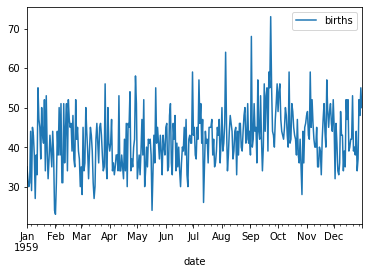

In [11]:
df.plot()

In [15]:
moving_average = df.rolling(window=20).mean()

In [16]:
moving_average.head()

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN


<AxesSubplot:xlabel='date'>

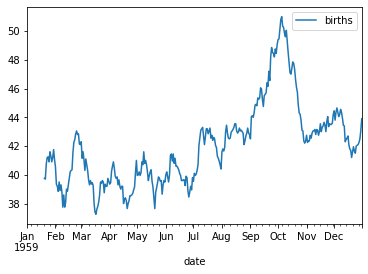

In [17]:
moving_average.plot()

In [18]:
smf.stats.durbin_watson(df)

array([0.04624491])

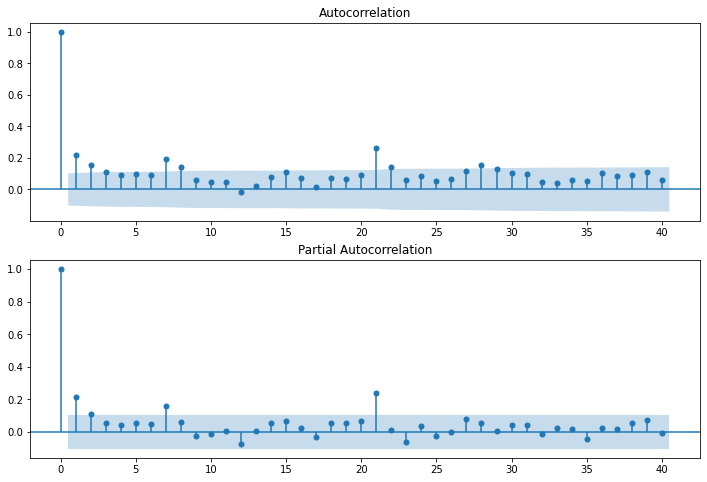

In [27]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = smf.graphics.tsa.plot_acf(df.values.squeeze(), lags=40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = smf.graphics.tsa.plot_pacf(df, lags=40, ax = ax2)

In [29]:
training_data = df[0:320]
test_data = df[320:]

In [30]:
from statsmodels.tsa.arima_model import ARIMA

In [32]:
arima = ARIMA(training_data,order=(2,1,3))

In [34]:
model = arima.fit()

C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [36]:
model.aic

2164.7000232994533

In [40]:
pred = model.forecast(steps = 45)[0]

In [41]:
from sklearn.metrics import mean_squared_error

In [43]:
np.sqrt(mean_squared_error(test_data, pred))

6.612987846442512

In [44]:
import statsmodels.api as sms

In [46]:
df = pd.read_csv(r'C:\Users\skme2\Downloads\time series.zip (Unzipped Files)-20220621T124218Z-001\time series.zip (Unzipped Files)\time series\Time-Series-main\airline_passengers.csv')

In [47]:
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [49]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [50]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [52]:
df.dropna(axis=0, inplace=True)

In [54]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [58]:
df['Month'] = pd.to_datetime(df['Month'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [60]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [63]:
df.set_index('Month', inplace=True)

In [64]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

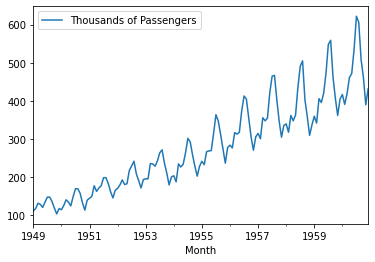

In [65]:
df.plot()

In [66]:
from statsmodels.tsa.stattools import adfuller

In [69]:
def adf_test(series):
    result = adfuller(series)
    print(result)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        

In [70]:
adf_test(df['Thousands of Passengers'])

(0.8153688792060508, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)
ADF Statistics: 0.8153688792060508
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [71]:
re = (0.8153688792060508, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)

In [72]:
re[0]

0.8153688792060508

In [73]:
re[1]

0.991880243437641

In [78]:
df['Passengers First Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [79]:
df.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [80]:
adf_test(df['Passengers First Difference'].dropna())

(-2.8292668241699883, 0.054213290283826945, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854084)
ADF Statistics: -2.8292668241699883
p- value: 0.054213290283826945
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [81]:
df['Passengers Second Difference']=df['Passengers First Difference']-df['Passengers First Difference'].shift(1)

In [82]:
df.head()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [83]:
adf_test(df['Passengers Second Difference'].dropna())

(-16.384231542468516, 2.7328918500141235e-29, 11, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.60204172756)
ADF Statistics: -16.384231542468516
p- value: 2.7328918500141235e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [84]:
df['Passengers 12 Difference']=df['Thousands of Passengers']-df['Thousands of Passengers'].shift(12)

In [85]:
adf_test(df['Passengers 12 Difference'].dropna())

(-3.3830207264924814, 0.011551493085514952, 1, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 919.527129208137)
ADF Statistics: -3.3830207264924814
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [86]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

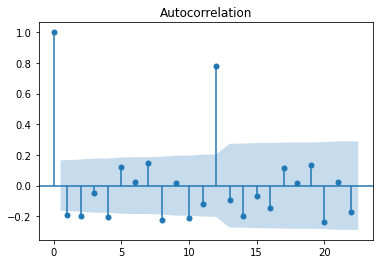

In [87]:
acf = plot_acf(df["Passengers Second Difference"].dropna())

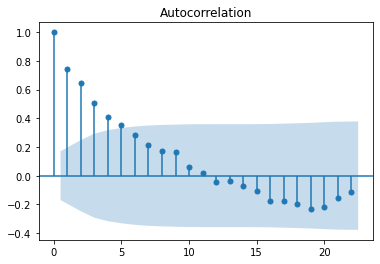

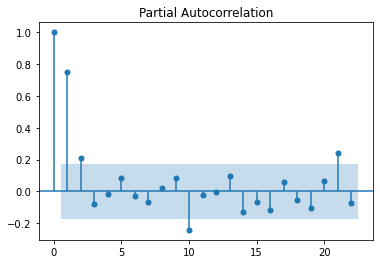

In [88]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


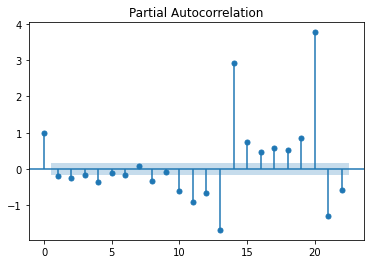

In [89]:
result = plot_pacf(df["Passengers Second Difference"].dropna())

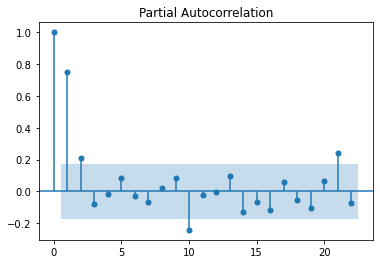

In [90]:
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

In [91]:
df

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [92]:
from datetime import datetime,timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [93]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [94]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [95]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [96]:
from statsmodels.tsa.arima_model import ARIMA

In [97]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(0,2,0))

C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [98]:
model_Arima_fit=model_ARIMA.fit()

In [99]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(0, 2, 0)   Log Likelihood                -385.782
Method:                                   css   S.D. of innovations             26.728
Date:                        Wed, 22 Jun 2022   AIC                            775.563
Time:                                11:59:42   BIC                            780.377
Sample:                            03-01-1949   HQIC                           777.496
                                 - 12-01-1955                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4268      2.952      0.145      0.885      -5.358       6.212
==============================================================================
"""

In [100]:
red_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [101]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [102]:
pred

1956-01-01    0.426829
1956-02-01    0.426829
1956-03-01    0.426829
1956-04-01    0.426829
1956-05-01    0.426829
1956-06-01    0.426829
1956-07-01    0.426829
1956-08-01    0.426829
1956-09-01    0.426829
1956-10-01    0.426829
1956-11-01    0.426829
1956-12-01    0.426829
1957-01-01    0.426829
1957-02-01    0.426829
1957-03-01    0.426829
1957-04-01    0.426829
1957-05-01    0.426829
1957-06-01    0.426829
1957-07-01    0.426829
1957-08-01    0.426829
1957-09-01    0.426829
1957-10-01    0.426829
1957-11-01    0.426829
1957-12-01    0.426829
1958-01-01    0.426829
1958-02-01    0.426829
1958-03-01    0.426829
1958-04-01    0.426829
1958-05-01    0.426829
1958-06-01    0.426829
1958-07-01    0.426829
1958-08-01    0.426829
1958-09-01    0.426829
1958-10-01    0.426829
1958-11-01    0.426829
1958-12-01    0.426829
1959-01-01    0.426829
1959-02-01    0.426829
1959-03-01    0.426829
1959-04-01    0.426829
1959-05-01    0.426829
1959-06-01    0.426829
1959-07-01    0.426829
1959-08-01 

In [103]:
residuals

Month
1956-01-01    283.573171
1956-02-01    276.573171
1956-03-01    316.573171
1956-04-01    312.573171
1956-05-01    317.573171
1956-06-01    373.573171
1956-07-01    412.573171
1956-08-01    404.573171
1956-09-01    354.573171
1956-10-01    305.573171
1956-11-01    270.573171
1956-12-01    305.573171
1957-01-01    314.573171
1957-02-01    300.573171
1957-03-01    355.573171
1957-04-01    347.573171
1957-05-01    354.573171
1957-06-01    421.573171
1957-07-01    464.573171
1957-08-01    466.573171
1957-09-01    403.573171
1957-10-01    346.573171
1957-11-01    304.573171
1957-12-01    335.573171
1958-01-01    339.573171
1958-02-01    317.573171
1958-03-01    361.573171
1958-04-01    347.573171
1958-05-01    362.573171
1958-06-01    434.573171
1958-07-01    490.573171
1958-08-01    504.573171
1958-09-01    403.573171
1958-10-01    358.573171
1958-11-01    309.573171
1958-12-01    336.573171
1959-01-01    359.573171
1959-02-01    341.573171
1959-03-01    405.573171
1959-04-01    395.5

<AxesSubplot:ylabel='Density'>

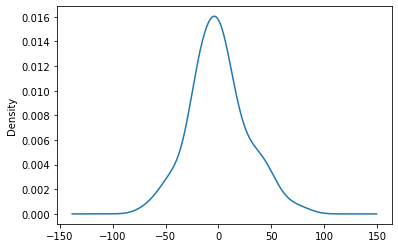

In [104]:
model_Arima_fit.resid.plot(kind='kde')

In [105]:
test_data['Predicted_ARIMA']=pred

<ipython-input-105-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot:xlabel='Month'>

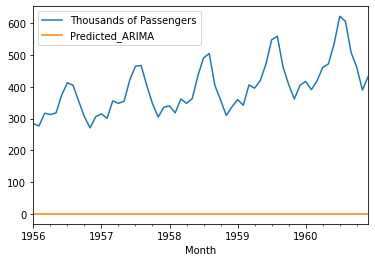

In [106]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

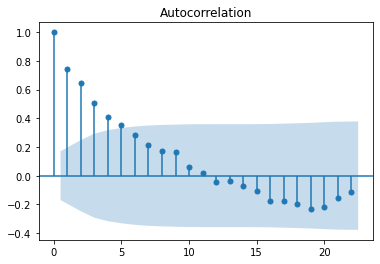

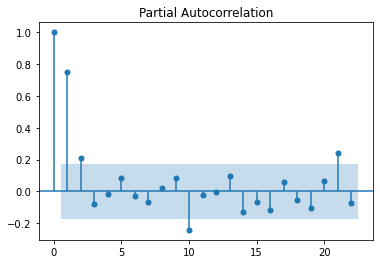

In [108]:
acf12 = plot_acf(df["Passengers 12 Difference"].dropna())
pacf12 = plot_pacf(df["Passengers 12 Difference"].dropna())

In [109]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [110]:
model_SARIMA=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [111]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [112]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Wed, 22 Jun 2022   AIC                            548.481
Time:                                     12:02:04   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.639
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6001      0.940      0.638      0.523      -1.243       2.443
ar.L2          0.8317      0.233      3.574      0.000       0.376       1.288
ar.L3         -0.4547      0.897     -0.507      0.612      -2.213       1.303
ma.L1          0.1819      1.183      0.154      0.878      -2.136       2.500
ma.L2         -0.5364      1.282     -0.418      0.676      -3.049       1.977
ma.L3         -0.0986      0.390     -0.253      0.801      -0.864       0.667
ma.L4         -0.1270      0.345     -0.368      0.713      -0.803       0.549
ma.L5          0.2471      0.362      0.684      0.494      -0.461       0.956
sigma2        87.6924     83.159      1.055      0.292     -75.297     250.681
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
test_data.tail()

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,0.426829
1960-09-01,508.0,-98.0,-82.0,45.0,0.426829
1960-10-01,461.0,-47.0,51.0,54.0,0.426829
1960-11-01,390.0,-71.0,-24.0,28.0,0.426829
1960-12-01,432.0,42.0,113.0,27.0,0.426829


In [114]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [115]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals=test_data['Thousands of Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

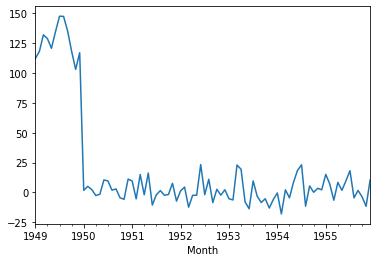

In [116]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

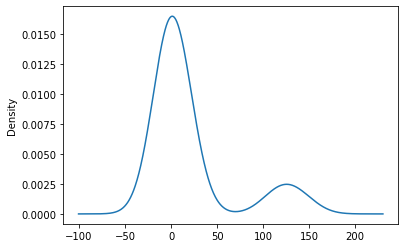

In [117]:
model_SARIMA_fit.resid.plot(kind='kde')

In [118]:
test_data['Predicted_SARIMA']=pred_Sarima

<ipython-input-118-5be0f969ecf6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [119]:
test_data


,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,0.426829,NaN
1956-02-01,277.0,-7.0,-13.0,44.0,0.426829,NaN
1956-03-01,317.0,40.0,47.0,50.0,0.426829,NaN
1956-04-01,313.0,-4.0,-44.0,44.0,0.426829,NaN
1956-05-01,318.0,5.0,9.0,48.0,0.426829,NaN
1956-06-01,374.0,56.0,51.0,59.0,0.426829,NaN
1956-07-01,413.0,39.0,-17.0,49.0,0.426829,403.409907
1956-08-01,405.0,-8.0,-47.0,58.0,0.426829,385.086403
1956-09-01,355.0,-50.0,-42.0,43.0,0.426829,349.458137


<AxesSubplot:xlabel='Month'>

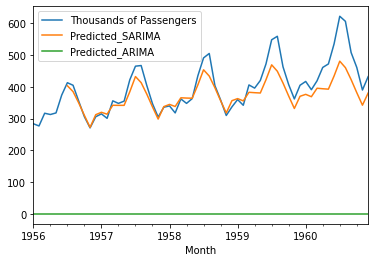

In [120]:
test_data[['Thousands of Passengers','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [121]:
!pip install pandas-datareader

In [122]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [123]:
df_tesla=pdr.get_data_yahoo('TSLA')

In [124]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-06-14,678.989990,635.210022,654.859985,662.669983,32662900.0,662.669983
2022-06-15,706.989990,654.450012,662.750000,699.000000,39710600.0,699.000000
2022-06-16,675.500000,626.080017,668.210022,639.299988,35796900.0,639.299988
2022-06-17,662.909973,639.590027,640.299988,650.280029,30810900.0,650.280029
2022-06-21,730.729980,673.000000,673.809998,711.109985,40845000.0,711.109985


<AxesSubplot:xlabel='Date'>

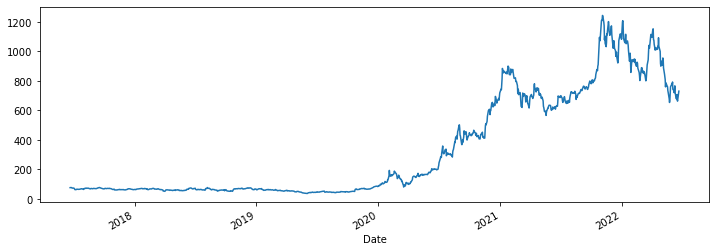

In [125]:
df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

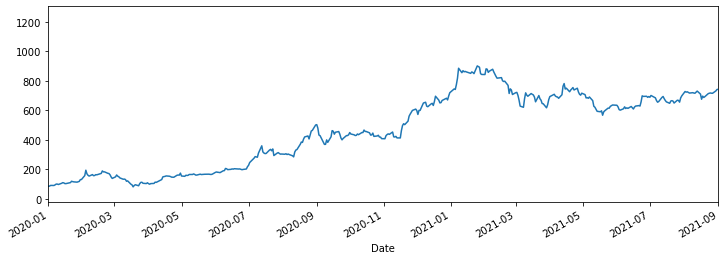

In [126]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

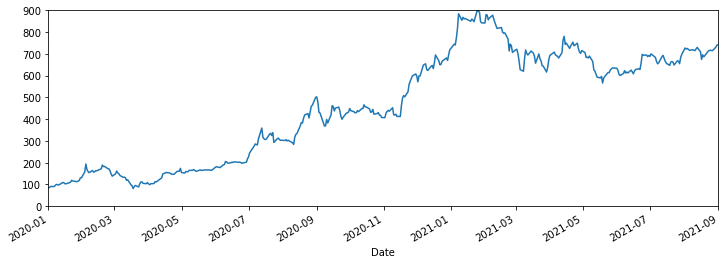

In [127]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

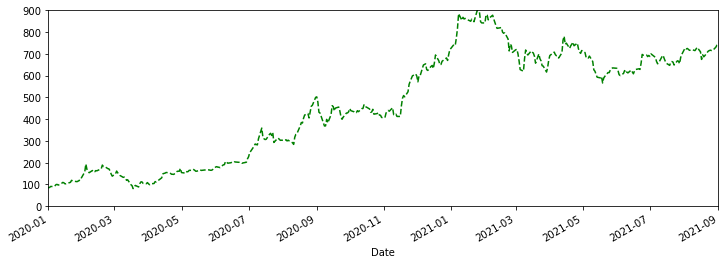

In [128]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4),ls='--',c='green')

In [129]:
df_tesla.index

DatetimeIndex(['2017-06-22', '2017-06-23', '2017-06-26', '2017-06-27',
               '2017-06-28', '2017-06-29', '2017-06-30', '2017-07-03',
               '2017-07-05', '2017-07-06',
               ...
               '2022-06-07', '2022-06-08', '2022-06-09', '2022-06-10',
               '2022-06-13', '2022-06-14', '2022-06-15', '2022-06-16',
               '2022-06-17', '2022-06-21'],
              dtype='datetime64[ns]', name='Date', length=1258, freq=None)

In [130]:
index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [131]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

In [132]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

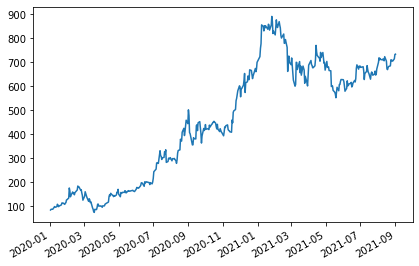

In [133]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

In [134]:
df_tesla=df_tesla.reset_index()

In [135]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Open       1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   float64       
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 68.9 KB


In [136]:
df_tesla=df_tesla.set_index('Date',drop=True)

In [137]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-22,77.000000,74.713997,75.598000,76.522003,37649000.0,76.522003
2017-06-23,77.398003,75.870003,76.489998,76.690002,32229000.0,76.690002
2017-06-26,77.389999,74.620003,77.337997,75.498001,33020500.0,75.498001
2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999
2017-06-28,74.348000,72.503998,73.335999,74.248001,31512500.0,74.248001


In [138]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [139]:
datetime.now()

datetime.datetime(2022, 6, 22, 12, 17, 35, 958360)

In [140]:
date=datetime(2021,11,21)

In [141]:
date.date()

datetime.date(2021, 11, 21)

In [142]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-22,77.000000,74.713997,75.598000,76.522003,37649000.0,76.522003
2017-06-23,77.398003,75.870003,76.489998,76.690002,32229000.0,76.690002
2017-06-26,77.389999,74.620003,77.337997,75.498001,33020500.0,75.498001
2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999
2017-06-28,74.348000,72.503998,73.335999,74.248001,31512500.0,74.248001


In [143]:
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,60.891998,58.526001,59.900002,59.852001,15247500.0,59.852001
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,653.919983,620.570007,623.849976,628.159973,16330900.0,628.159973


In [144]:
df_tesla.resample(rule='A').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-31,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


<AxesSubplot:xlabel='Date'>

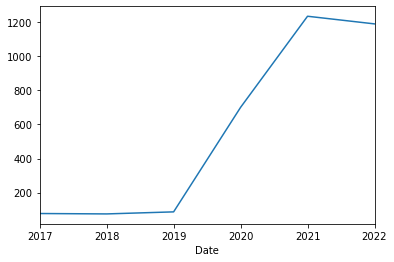

In [145]:
df_tesla.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

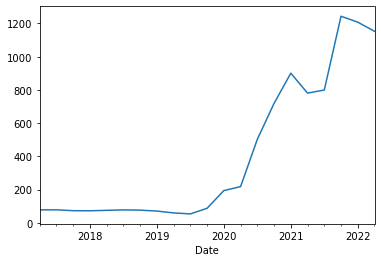

In [146]:
df_tesla.resample(rule='QS').max()['High'].plot()

In [147]:
df_tesla.resample(rule='BA').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-29,77.921997,75.870003,77.337997,77.000000,98957000.0,77.000000
2018-12-31,77.491997,73.424004,75.000000,75.914001,168248500.0,75.914001
2019-12-31,87.061996,85.269997,87.000000,86.188004,150030500.0,86.188004
2020-12-31,718.719971,691.119995,699.989990,705.669983,304694000.0,705.669983
2021-12-31,1243.489990,1217.000000,1234.410034,1229.910034,89396500.0,1229.910034
2022-12-30,1208.000000,1136.040039,1189.550049,1199.780029,50521900.0,1199.780029


In [148]:
df_tesla.resample(rule='BQS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-04-03,77.398003,75.870003,77.337997,76.690002,41105000.0,76.690002
2017-07-03,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-02,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-02,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-02,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998
2019-04-01,59.234001,57.433998,57.660000,58.362000,132735500.0,58.362000


<AxesSubplot:xlabel='Date'>

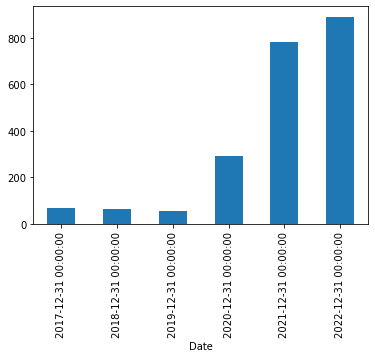

In [149]:
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

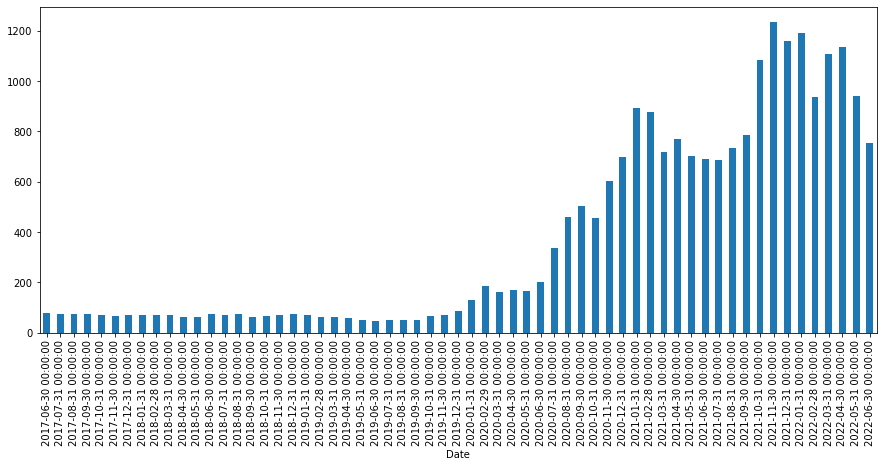

In [150]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [151]:
df_tesla['High'].rolling(11).max().head(20)

Date
2017-06-22          NaN
2017-06-23          NaN
2017-06-26          NaN
2017-06-27          NaN
2017-06-28          NaN
2017-06-29          NaN
2017-06-30          NaN
2017-07-03          NaN
2017-07-05          NaN
2017-07-06          NaN
2017-07-07    77.398003
2017-07-10    77.398003
2017-07-11    77.389999
2017-07-12    75.279999
2017-07-13    74.348000
2017-07-14    74.269997
2017-07-17    74.269997
2017-07-18    74.269997
2017-07-19    69.447998
2017-07-20    66.620003
Name: High, dtype: float64

In [152]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-22,77.000000,74.713997,75.598000,76.522003,37649000.0,76.522003
2017-06-23,77.398003,75.870003,76.489998,76.690002,32229000.0,76.690002
2017-06-26,77.389999,74.620003,77.337997,75.498001,33020500.0,75.498001
2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999
2017-06-28,74.348000,72.503998,73.335999,74.248001,31512500.0,74.248001


In [153]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [154]:
df_tesla.head(31)

,High,Low,Open,Close,Volume,Adj Close,Open:30 days rolling
Date,,,,,,,
2017-06-22,77.000000,74.713997,75.598000,76.522003,37649000.0,76.522003,NaN
2017-06-23,77.398003,75.870003,76.489998,76.690002,32229000.0,76.690002,NaN
2017-06-26,77.389999,74.620003,77.337997,75.498001,33020500.0,75.498001,NaN
2017-06-27,75.279999,72.403999,75.279999,72.473999,34982000.0,72.473999,NaN
2017-06-28,74.348000,72.503998,73.335999,74.248001,31512500.0,74.248001,NaN
2017-06-29,74.199997,70.820000,74.122002,72.150002,41105000.0,72.150002,NaN
2017-06-30,73.353996,71.924004,72.741997,72.321999,29242500.0,72.321999,NaN
2017-07-03,74.269997,70.300003,74.047997,70.524002,31527000.0,70.524002,NaN
2017-07-05,69.447998,65.265999,69.440002,65.417999,85233500.0,65.417999,NaN


<AxesSubplot:xlabel='Date'>

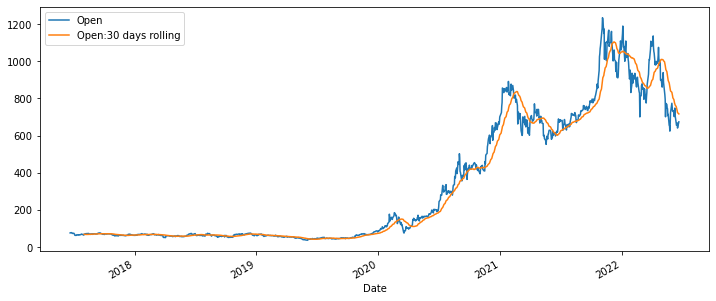

In [155]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))

In [157]:
dta= pd.read_csv(r"C:\Users\skme2\Downloads\time series.zip (Unzipped Files)-20220621T124218Z-001\time series.zip (Unzipped Files)\time series\ts-sunspot\sunspots.csv")
dta.head(10)

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
5,1705,58.0
6,1706,29.0
7,1707,20.0
8,1708,10.0
9,1709,8.0


In [158]:
pwd()

'C:\\Users\\skme2\\OneDrive\\Documents\\Python Scripts'

In [159]:
print(sms.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [160]:
dta.index = pd.Index(sms.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]

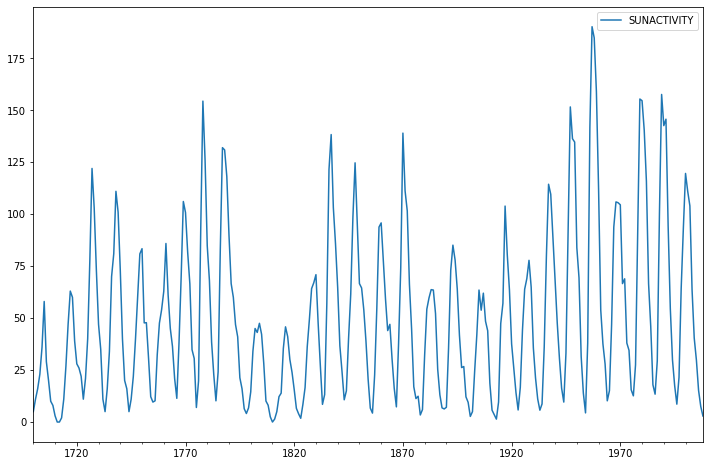

In [163]:
dta.plot(figsize=(12,8));

In [164]:
sms.stats.durbin_watson(dta)

array([0.13952893])

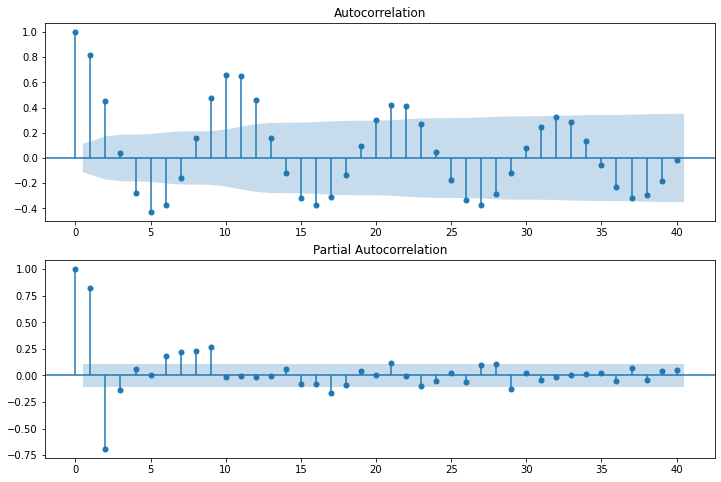

In [166]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sms.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sms.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

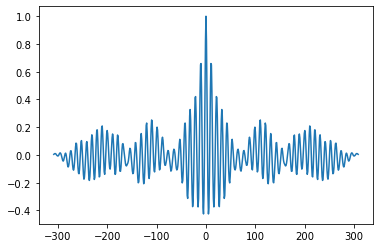

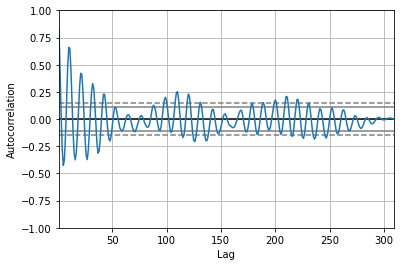

In [167]:
from pandas.plotting import autocorrelation_plot
%matplotlib inline
dta['SUNACTIVITY_2'] = dta['SUNACTIVITY']
dta['SUNACTIVITY_2'] = (dta['SUNACTIVITY_2'] - dta['SUNACTIVITY_2'].mean()) / (dta['SUNACTIVITY_2'].std())
plt.acorr(dta['SUNACTIVITY_2'],maxlags = len(dta['SUNACTIVITY_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(dta['SUNACTIVITY'])
plt.show()

In [169]:
arma_mod20 = sms.tsa.ARMA(dta['SUNACTIVITY'], (1,0)).fit()
print(arma_mod20.params)

const                48.400293
ar.L1.SUNACTIVITY     0.824429
dtype: float64


C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency A-DEC

In [170]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2819.16915243735 2830.3691762680432 2823.6469433212847


In [171]:
sms.stats.durbin_watson(arma_mod20.resid.values)

0.8636763516855228

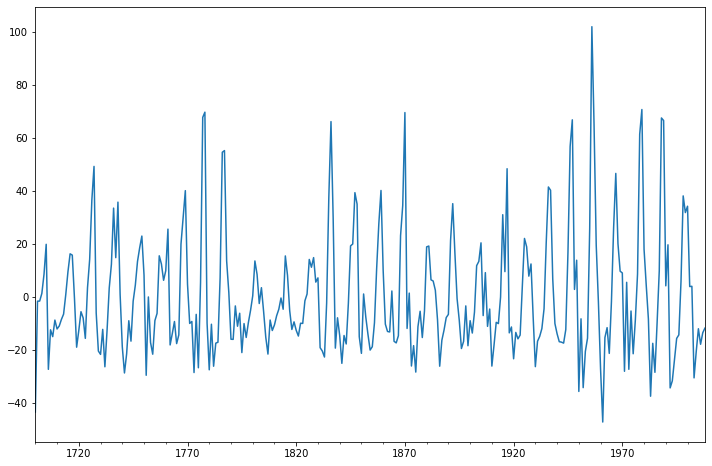

In [172]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

In [176]:
from scipy import stats
resid20 = arma_mod20.resid
stats.normaltest(resid20)

NormaltestResult(statistic=72.07994143125988, pvalue=2.2286383024839084e-16)

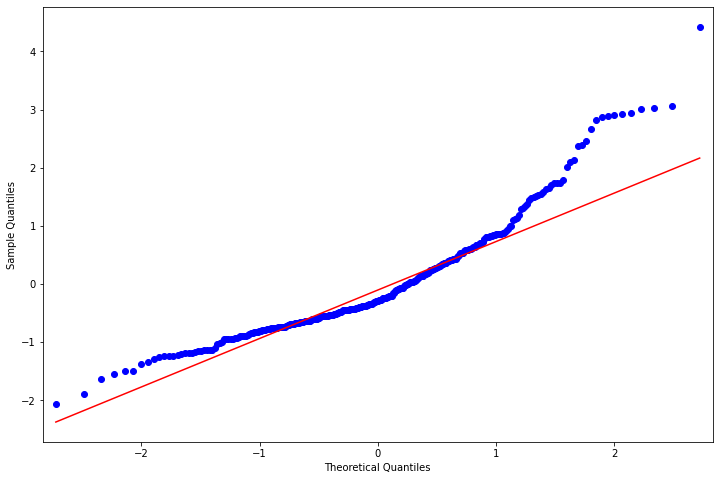

In [177]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

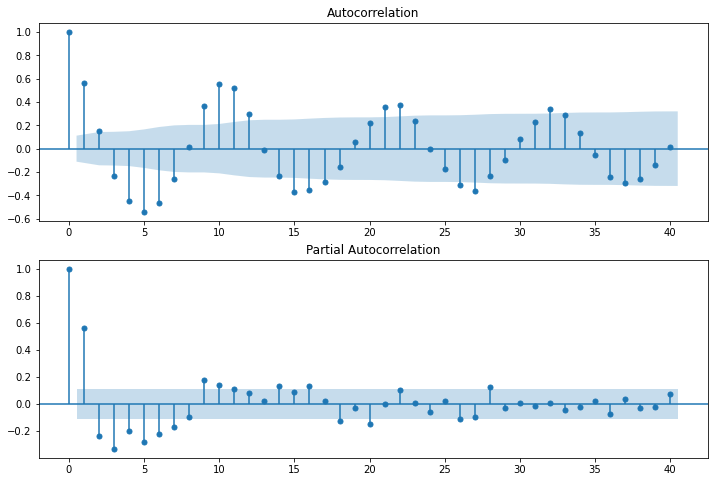

In [179]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sms.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sms.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

In [181]:
r,q,p = sms.tsa.acf(resid20.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC            Q       Prob(>Q)
lag                                       
1.0   0.561922    98.518972   3.219256e-23
2.0   0.154946   106.034144   9.440135e-24
3.0  -0.236914   123.661157   1.255590e-26
4.0  -0.445261   186.127866   3.599736e-39
5.0  -0.539181   278.027589   5.280857e-58
6.0  -0.462535   345.880074   1.182714e-71
7.0  -0.260944   367.547427   2.153468e-75
8.0   0.015898   367.628124   1.558329e-74
9.0   0.365133   410.335243   8.531127e-83
10.0  0.550091   507.591395  1.053238e-102
11.0  0.523266   595.888769  1.061051e-120
12.0  0.299586   624.929295  5.013417e-126
13.0 -0.009197   624.956759  3.650409e-125
14.0 -0.235965   643.094849  3.531994e-128
15.0 -0.369180   687.644747  7.982589e-137
16.0 -0.351380   728.140056  1.320284e-144
17.0 -0.281668   754.250332  2.522139e-149
18.0 -0.157575   762.450056  3.084540e-150
19.0  0.059681   763.630345  1.144637e-149
20.0  0.223295   780.210116  2.241338e-152
21.0  0.359878   823.425441  9.769213e-161
22.0  0.374

C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\skme2\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [182]:
predict_sunspots20 = arma_mod20.predict('1990', '2012', dynamic=True)
print(predict_sunspots20)

1990-12-31    138.427671
1991-12-31    122.621452
1992-12-31    109.590350
1993-12-31     98.847135
1994-12-31     89.990120
1995-12-31     82.688142
1996-12-31     76.668182
1997-12-31     71.705153
1998-12-31     67.613490
1999-12-31     64.240205
2000-12-31     61.459172
2001-12-31     59.166408
2002-12-31     57.276188
2003-12-31     55.717836
2004-12-31     54.433086
2005-12-31     53.373901
2006-12-31     52.500678
2007-12-31     51.780769
2008-12-31     51.187254
2009-12-31     50.697944
2010-12-31     50.294543
2011-12-31     49.961967
2012-12-31     49.687782
Freq: A-DEC, dtype: float64


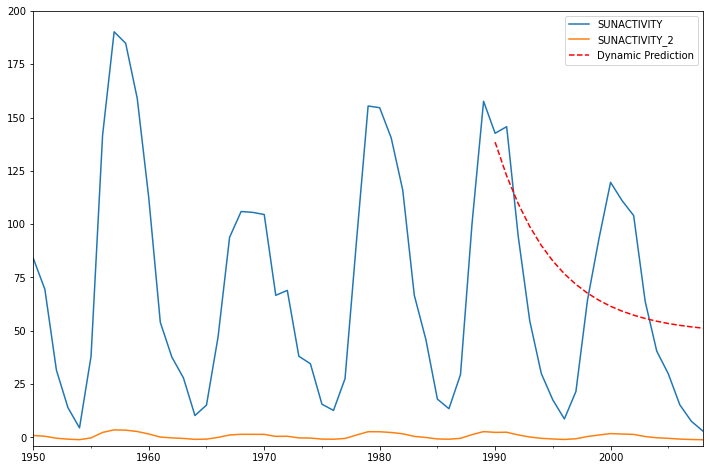

In [183]:
ax = dta.loc['1950':].plot(figsize=(12,8))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

In [184]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error = * 100

In [185]:
print("MFE = ", mean_forecast_err(dta.SUNACTIVITY, predict_sunspots20))
print("MAE = ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots20))

MFE =  -13.309852176739005
MAE =  0.2074616616641949


In [186]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [187]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [188]:
y

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


In [189]:
y['co2'].resample('MS')

In [190]:
y['co2'].resample('MS').mean()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

In [191]:
y = y['co2'].resample('MS').mean()

y = y.fillna(y.bfill())

print(y)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64


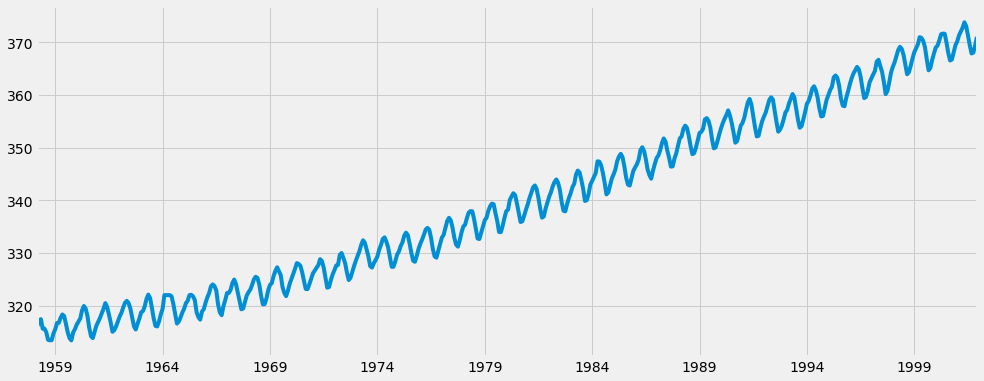

In [192]:
y.plot(figsize=(15, 6))
plt.show()

In [193]:

p = d = q = range(0, 2)


pdq = list(itertools.product(p, d, q))


seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [194]:
p = d = q = range(0, 2)

In [195]:
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [196]:
[(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [197]:
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

In [198]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [199]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [200]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.34362403644
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.8282341412219
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727643107
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.287846222974
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578977876184
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.764791305057
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048754631463
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.66232746561
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067375353
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716795496
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1086.7020772712976
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.4314566469482
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893615237
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912989065928
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.221119919408
ARI

In [201]:
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

In [202]:
pd.DataFrame(y).T

,1958-03-01,1958-04-01,1958-05-01,1958-06-01,1958-07-01,1958-08-01,1958-09-01,1958-10-01,1958-11-01,1958-12-01,1959-01-01,1959-02-01,1959-03-01,1959-04-01,1959-05-01,1959-06-01,1959-07-01,1959-08-01,1959-09-01,1959-10-01,1959-11-01,1959-12-01,1960-01-01,1960-02-01,1960-03-01,1960-04-01,1960-05-01,1960-06-01,1960-07-01,1960-08-01,1960-09-01,1960-10-01,1960-11-01,1960-12-01,1961-01-01,1961-02-01,1961-03-01,1961-04-01,1961-05-01,1961-06-01,1961-07-01,1961-08-01,1961-09-01,1961-10-01,1961-11-01,1961-12-01,1962-01-01,1962-02-01,1962-03-01,1962-04-01,1962-05-01,1962-06-01,1962-07-01,1962-08-01,1962-09-01,1962-10-01,1962-11-01,1962-12-01,1963-01-01,1963-02-01,...,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01,1998-07-01,1998-08-01,1998-09-01,1998-10-01,1998-11-01,1998-12-01,1999-01-01,1999-02-01,1999-03-01,1999-04-01,1999-05-01,1999-06-01,1999-07-01,1999-08-01,1999-09-01,1999-10-01,1999-11-01,1999-12-01,2000-01-01,2000-02-01,2000-03-01,2000-04-01,2000-05-01,2000-06-01,2000-07-01,2000-08-01,2000-09-01,2000-10-01,2000-11-01,2000-12-01,2001-01-01,2001-02-01,2001-03-01,2001-04-01,2001-05-01,2001-06-01,2001-07-01,2001-08-01,2001-09-01,2001-10-01,2001-11-01,2001-12-01
co2,316.1,317.2,317.433333,315.625,315.625,314.95,313.5,313.425,313.425,314.7,315.5,316.7,316.733333,317.675,318.325,318.025,316.525,314.9,313.825,313.4,314.875,315.525,316.38,316.975,317.575,319.12,319.925,319.45,318.06,315.775,314.175,313.84,315.025,316.2,316.925,317.65,318.525,319.42,320.475,319.75,318.32,316.775,315.04,315.35,316.05,316.98,317.925,318.625,319.68,320.55,320.9,320.5,319.425,317.733333,316.066667,315.475,316.55,317.525,318.725,318.966667,...,363.125,363.875,364.56,366.325,366.68,365.475,364.375,362.46,360.15,360.75,362.38,364.25,365.34,366.2,367.375,368.525,369.14,368.75,367.6,365.72,363.925,364.32,365.55,366.925,368.12,368.85,369.6,370.975,370.84,370.25,369.0,366.7,364.675,365.14,366.65,367.9,369.02,369.375,370.4,371.54,371.65,371.625,369.94,367.95,366.54,366.725,368.125,369.44,370.175,371.325,372.06,372.775,373.8,373.06,371.3,369.425,367.88,368.05,369.375,371.02


In [203]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3181      0.092      3.441      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.163      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.813      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.633      0.000       0.089       0.106


In [204]:
results.summary().tables[2]

Ljung-Box (L1) (Q):,0.05,Jarque-Bera (JB):,187.89
Prob(Q):,0.82,Prob(JB):,0.00
Heteroskedasticity (H):,0.65,Skew:,0.40
Prob(H) (two-sided):,0.01,Kurtosis:,5.90


In [205]:
results.summary().tables[0]

Dep. Variable:,co2,No. Observations:,526
Model:,"SARIMAX(1, 1, 1)x(1, 1, 1, 12)",Log Likelihood,-133.890
Date:,"Wed, 22 Jun 2022",AIC,277.780
Time:,12:32:52,BIC,298.843
Sample:,03-01-1958,HQIC,286.046
,- 12-01-2001,,
Covariance Type:,opg,,


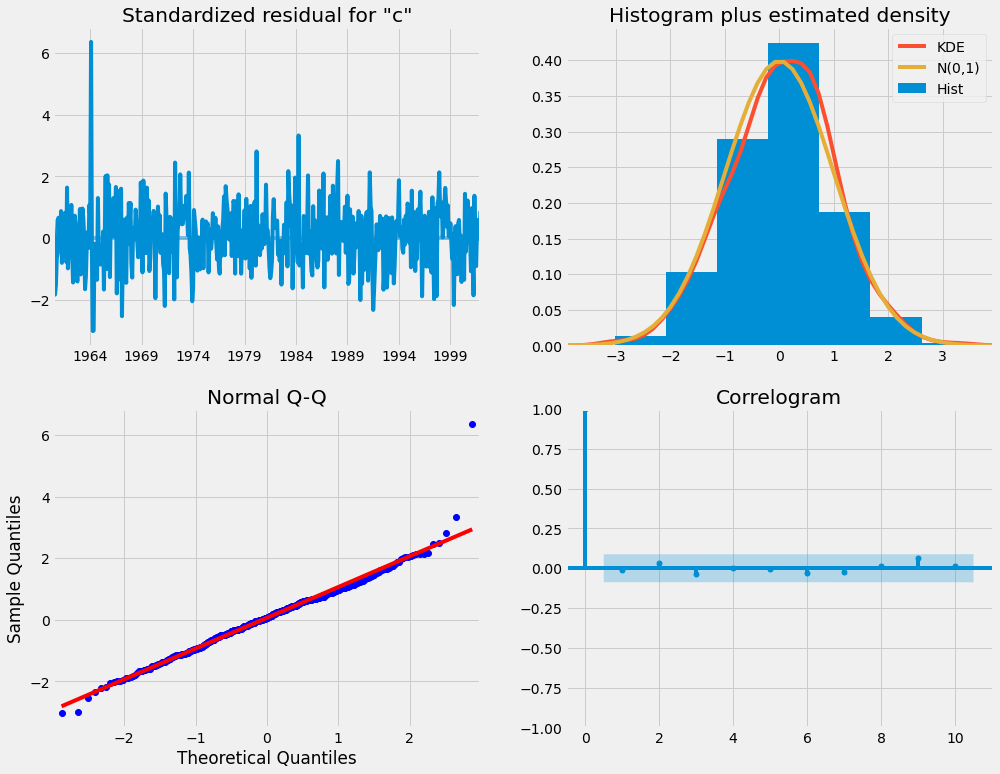

In [206]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [207]:
pred = results.get_prediction(start=pd.to_datetime('1958-03-01'), dynamic=False)
pred_ci = pred.conf_int()

In [208]:
pred_ci = pred.conf_int()
pred_ci['y'] = y

In [209]:
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

In [210]:
pred_ci

,lower co2,upper co2,y
1958-03-01,-3394.757202,3394.757202,316.100000
1958-04-01,-2468.557104,3167.801418,317.200000
1958-05-01,-2485.249234,3130.327530,317.433333
1958-06-01,-2489.240949,3125.839122,315.625000
1958-07-01,-2492.069764,3122.998367,315.625000
...,...,...,...
2001-08-01,368.733915,369.955786,369.425000
2001-09-01,367.085350,368.307221,367.880000
2001-10-01,367.427782,368.649653,368.050000
2001-11-01,368.773722,369.995593,369.375000


In [211]:
pred = results.get_prediction(start=pd.to_datetime('1995-01-01'), dynamic=False)
pred
pred_ci = pred.conf_int()

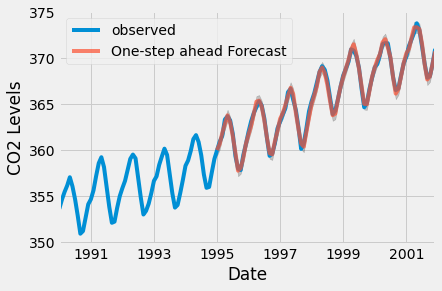

In [212]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [213]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [214]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

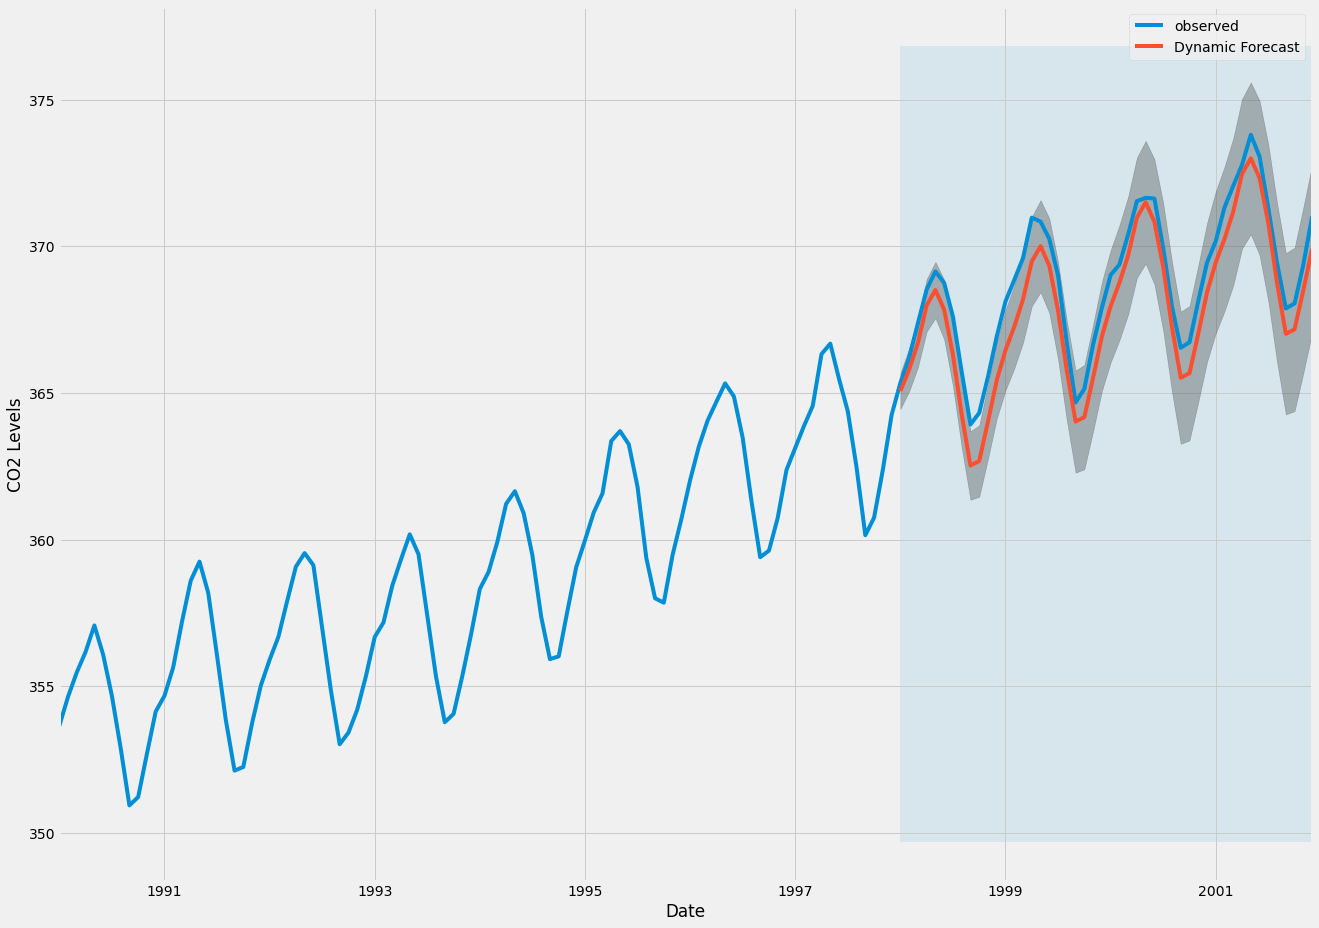

In [215]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [216]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]


mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [217]:
pred_uc = results.get_forecast(steps=500)


pred_ci = pred_uc.conf_int()
pred_ci

,lower co2,upper co2
2002-01-01,371.366714,372.588585
2002-02-01,372.005879,373.492301
2002-03-01,372.834956,374.489648
2002-04-01,373.963411,375.755825
2002-05-01,374.387764,376.303744
...,...,...
2043-04-01,410.881199,467.635941
2043-05-01,411.294921,468.194987
2043-06-01,410.645701,467.690688
2043-07-01,409.053087,466.242616


In [218]:
y

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    315.625000
1958-07-01    315.625000
                 ...    
2001-08-01    369.425000
2001-09-01    367.880000
2001-10-01    368.050000
2001-11-01    369.375000
2001-12-01    371.020000
Freq: MS, Name: co2, Length: 526, dtype: float64

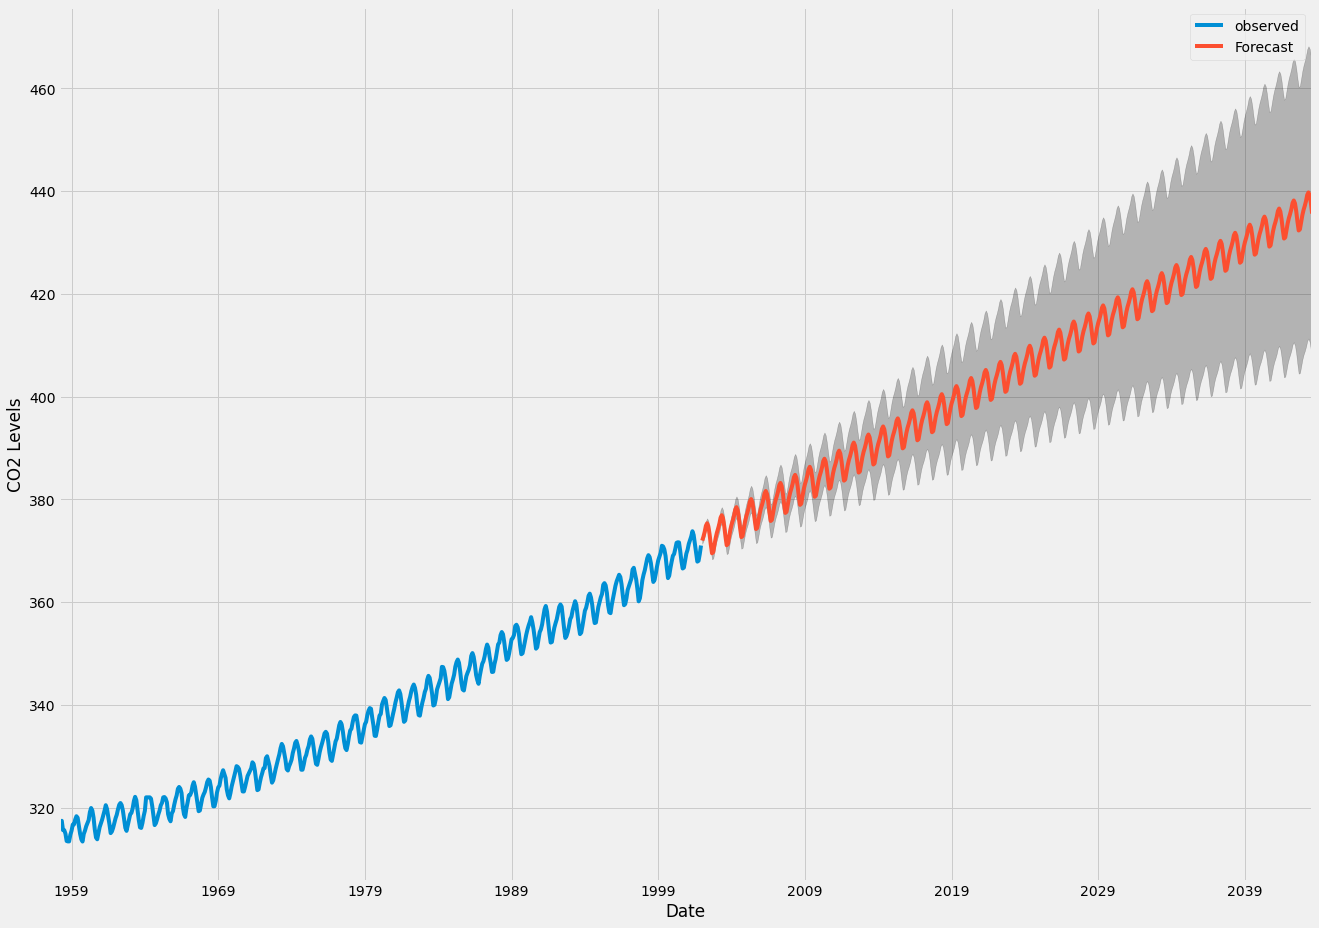

In [219]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [220]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\skme2\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\skme2\\AppData\\Local\\Temp\\pip-install-cqe2onlh\\fbprophet_8897d7644e5840cab9e63b9e23337941\\setup.py'"'"'; __file__='"'"'C:\\Users\\skme2\\AppData\\Local\\Temp\\pip-install-cqe2onlh\\fbprophet_8897d7644e5840cab9e63b9e23337941\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\skme2\AppData\Local\Temp\pip-wheel-kqs7sz58'
       cwd: C:\Users\skme2\AppData\Local\Temp\pip-install-cqe2onlh\fbprophet_8897d7644e5840cab9e63b9e23337941\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL

In [221]:
results.get_forecast(100)